In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.stats import mode
from matplotlib import pyplot as plt


data = pd.read_json("../../data.json")
data.sample(2)

index           mac                        timestamp  no  rssi  \
16487      1  c300000a7a46 2024-11-10 17:35:16.737000+00:00   0   -49   
2206     118  c300000a7a48 2024-10-04 17:29:12.208000+00:00   0   -45   

                                                     raw  frequency  \
16487  0201061bff3906cafb0114f6ffecff0701000000000000...       2426   
2206   0201061bff3906cafb01140002ffe70102000000000000...       2426   

                                                      iq  angle    distance  \
16487  [-155, -45, 72, -146, 140, 83, -117, 102, -80,...     75  155.291427   
2206   [124, -127, 105, 144, -164, 84, -68, -173, 172...    135  100.000000   

      capture                                                ref  \
16487  camila  [-2.8590377011, -1.112643168, 0.5351508451, 2....   
2206       tw  [-0.7973497855, 0.9407624172000001, 2.66823661...   

                                                      a1  \
16487  [-0.5965640382, -2.9078494727, 1.4543662384, -...   
2206   [-2.1282851484, 2.0636327238, -0.1329017950000...   

                                                      a2  \
16487  [2.2907144653, 0.0487418513, -2.0397630346, 2....   
2206   [3.1333283789, 0.9025069080000001, -1.31427971...   

                                                      a3  \
16487  [-0.1595517209, -2.3398025158999998, 1.6892862...   
2206   [2.3310741473, 0.0831412319, -2.0863453343, 2....   

                                                    a2a1  \
16487  [2.8872785035, 2.956591324, 2.7890560342, 3.12...   
2206   [-1.0215717798, -1.1611258158, -1.1813779192, ...   

                                                    a3a2  \
16487  [-2.4502661862, -2.3885443672, -2.5541359867, ...   
2206   [-0.8022542316, -0.8193656761, -0.7720656201, ...   

                                                    a3a1  
16487  [0.4370123173, 0.5680469568000001, 0.234920047...  
2206   [-1.8238260115, -1.9804914919, -1.9534435393, ...

# PD in each line

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tsamples =[]
tlabels =[]

vsamples=[]
vlabels=[]

tdataset, vdataset = train_test_split(data[data["capture"]== "tw"],test_size=0.2)

for row in tdataset.iterrows():
    for i in range(len(row[1]["a2a1"])):
        tsamples.append([
            row[1]["a2a1"][i], row[1]["a3a2"][i], row[1]["a3a1"][i]
        ])
        tlabels.append(row[1]["angle"])

for row in vdataset.iterrows():
    for i in range(len(row[1]["a2a1"])):
        vsamples.append([
            row[1]["a2a1"][i], row[1]["a3a2"][i], row[1]["a3a1"][i]
        ])
        vlabels.append(row[1]["angle"])

X_train = tsamples
y_train = [label//15 for label in tlabels ]

X_test = vsamples
y_test = [label//15 for label in vlabels ]


array_names= ([str(name) for name in range(0,180+15,15)])

In [3]:

#Splitting the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creating an XGBoost classifier
model = xgb.XGBClassifier(enable_categorical=True)

#Training the model on the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [4]:
#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=array_names))

Accuracy: 0.8472009708225611

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1540
          15       0.62      0.71      0.66      1441
          30       0.74      0.62      0.67      1562
          45       0.85      0.91      0.88      1386
          60       0.97      0.97      0.97      1507
          75       0.82      0.91      0.86       968
          90       0.87      0.91      0.89      1331
         105       0.91      0.86      0.88      1419
         120       0.91      0.90      0.90      1672
         135       0.91      0.90      0.91      1496
         150       0.91      0.88      0.90      1463
         165       0.84      0.88      0.86      1694
         180       0.93      0.90      0.92      1474

    accuracy                           0.85     18953
   macro avg       0.85      0.85      0.85     18953
weighted avg       0.85      0.85      0.85     18953



In [5]:
results_labels= []
results_values = []
for row in vdataset.iterrows():
    pred=[]
    for i in range(len(row[1]["a2a1"])):
        pred.append(model.predict([[row[1]["a2a1"][i], row[1]["a3a2"][i], row[1]["a3a1"][i]],])[0])
    results_labels.append((row[1]["angle"]//15))
    results_values.append(mode(pred)[0][0])

C:\Users\pedro\AppData\Local\Temp\ipykernel_19332\3619321459.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  results_values.append(mode(pred)[0][0])


In [6]:
#Calculating accuracy
accuracy = accuracy_score(results_labels, results_values)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(results_labels, results_values, target_names=array_names))

Accuracy: 0.9077190946024376

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       140
          15       0.72      0.84      0.77       131
          30       0.92      0.70      0.80       142
          45       0.89      0.98      0.93       126
          60       0.98      0.97      0.97       137
          75       0.83      0.95      0.89        88
          90       0.90      0.95      0.92       121
         105       0.97      0.91      0.94       129
         120       0.97      0.95      0.96       152
         135       0.96      0.96      0.96       136
         150       0.98      0.92      0.95       133
         165       0.90      0.96      0.93       154
         180       0.95      0.91      0.93       134

    accuracy                           0.91      1723
   macro avg       0.91      0.91      0.91      1723
weighted avg       0.91      0.91      0.91      1723



In [7]:
results = {str(l):[] for l in set(vlabels)}

for row in vdataset.iterrows():
    pred=[]
    for i in range(len(row[1]["a2a1"])):
        pred.append(model.predict([[row[1]["a2a1"][i], row[1]["a3a2"][i], row[1]["a3a1"][i]],])[0])
    results[str(row[1]["angle"])].append(mode(pred)[0][0]*15)

C:\Users\pedro\AppData\Local\Temp\ipykernel_19332\2227316778.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  results[str(row[1]["angle"])].append(mode(pred)[0][0]*15)


In [8]:
for key, values in results.items():
    print(f"Angulo {key}\n" )
    for judgement in set(values):
        print(f"\t {judgement} = {100*values.count(judgement)/len(values)}% ")

Angulo 0

	 0 = 82.85714285714286% 
	 75 = 0.7142857142857143% 
	 30 = 2.142857142857143% 
	 15 = 14.285714285714286% 
Angulo 165

	 90 = 0.6493506493506493% 
	 180 = 1.948051948051948% 
	 165 = 96.1038961038961% 
	 150 = 1.2987012987012987% 
Angulo 135

	 165 = 2.2058823529411766% 
	 135 = 95.58823529411765% 
	 105 = 0.7352941176470589% 
	 180 = 0.7352941176470589% 
	 60 = 0.7352941176470589% 
Angulo 105

	 120 = 3.10077519379845% 
	 105 = 90.69767441860465% 
	 90 = 5.426356589147287% 
	 75 = 0.7751937984496124% 
Angulo 75

	 90 = 4.545454545454546% 
	 75 = 95.45454545454545% 
Angulo 45

	 60 = 0.7936507936507936% 
	 45 = 97.61904761904762% 
	 15 = 1.5873015873015872% 
Angulo 15

	 0 = 9.16030534351145% 
	 45 = 0.7633587786259542% 
	 15 = 83.96946564885496% 
	 180 = 0.7633587786259542% 
	 60 = 0.7633587786259542% 
	 30 = 4.580152671755725% 
Angulo 180

	 165 = 0.746268656716418% 
	 75 = 6.7164179104477615% 
	 180 = 91.04477611940298% 
	 150 = 0.746268656716418% 
	 90 = 0.7462686567164

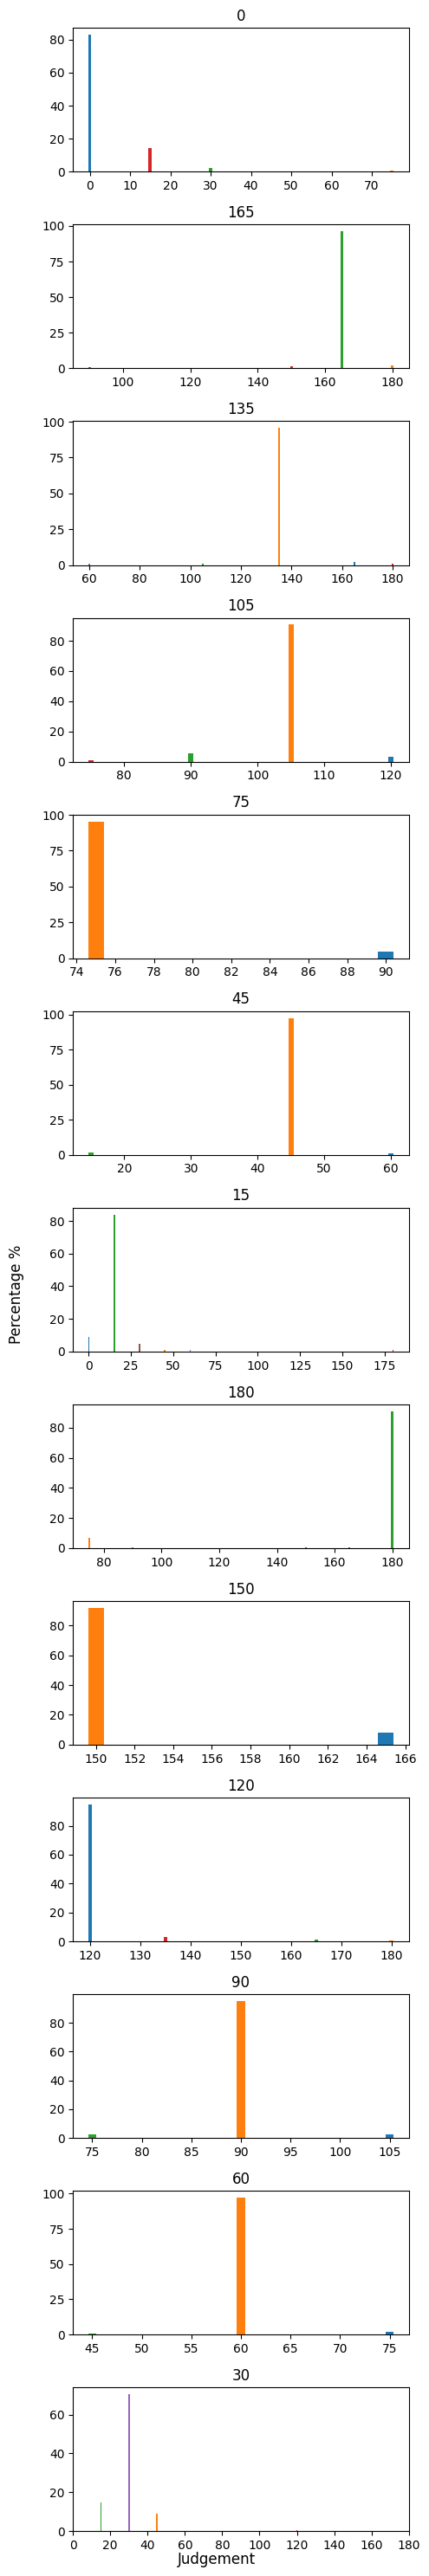

In [9]:
fig, ax = plt.subplots(len(set(results.keys())),figsize=(5,30))
fig.set_tight_layout(True)

fig.supylabel("Percentage %")
fig.supxlabel("Judgement")


for i, pair in enumerate(results.items()):
    for judgement in set(pair[1]):
        ax[i].title.set_text(pair[0])
        ax[i].bar(judgement,100*pair[1].count(judgement)/len(pair[1]),0.8)
        plt.xlim(0,180)


In [10]:
model.save_model("./xgb_classifier.json")